# EDA

## Data Load

In [1]:
import pandas as pd

data_path = './data/'

labels = pd.read_csv(data_path + 'train.csv')
submission = pd.read_csv(data_path + 'sample_submission.csv')

In [2]:
labels.head()

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


In [3]:
submission.head()

,id,has_cactus
0,000940378805c44108d287872b2f04ce.jpg,0.5
1,0017242f54ececa4512b4d7937d1e21e.jpg,0.5
2,001ee6d8564003107853118ab87df407.jpg,0.5
3,002e175c3c1e060769475f52182583d0.jpg,0.5
4,0036e44a7e8f7218e9bc7bf8137e4943.jpg,0.5


## Visualization

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

mpl.rc('font', size=15)
plt.figure(figsize=(7,7))

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

타깃값 별 비율 확인하기
- 어느 한 타깃값에 치우친 데이터인 경우 제대로된 예측이 불가능할 수 있음.

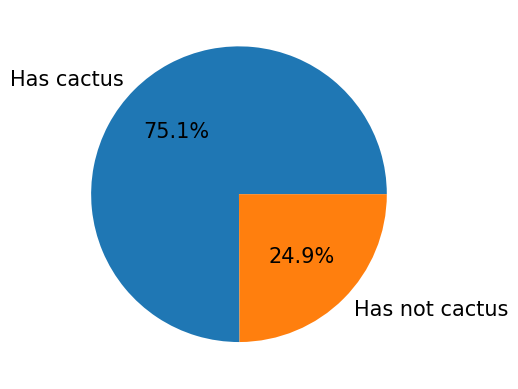

In [5]:
label = ['Has cactus', 'Has not cactus']
plt.pie(labels['has_cactus'].value_counts(), labels=label, autopct='%.1f%%')
plt.show()

In [6]:
# 압축 파일 코드로 풀기

from zipfile import ZipFile

with ZipFile(data_path + 'train.zip') as zipper:
    zipper.extractall()

with ZipFile(data_path + 'test.zip') as zipper:
    zipper.extractall()

데이터 수 확인하기

In [7]:
import os

num_train = len(os.listdir('train/'))
num_test = len(os.listdir('test/'))

print(f'훈련 데이터 개수: {num_train}')
print(f'테스트 데이터 개수: {num_test}')

훈련 데이터 개수: 17500
테스트 데이터 개수: 4000


이미지 데이터 확인하기

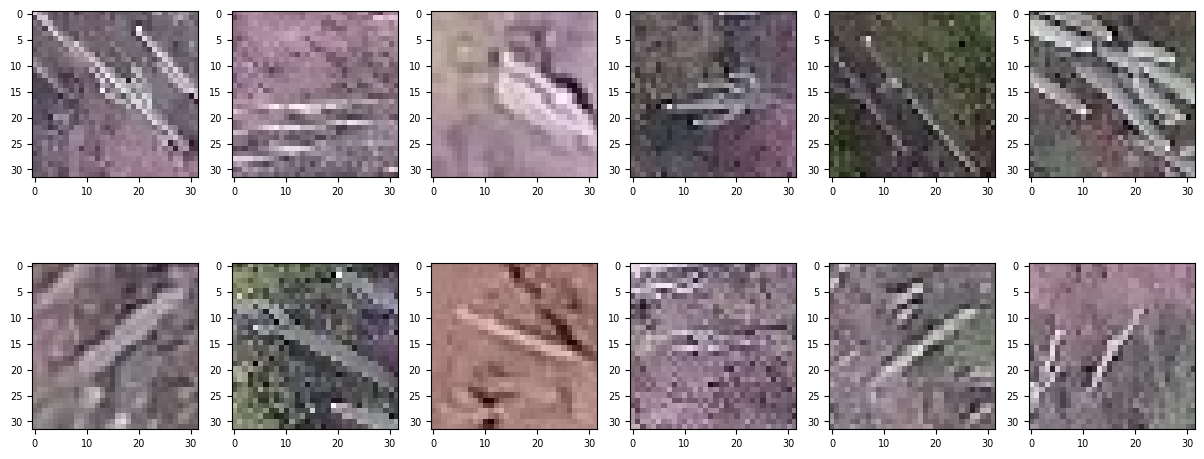

In [9]:
import matplotlib.gridspec as gridspec
import cv2

mpl.rc('font', size=7)
plt.figure(figsize=(15,6))
grid = gridspec.GridSpec(2,6)   # 서브플롯 배치

# 선인장을 포함하는 이미지 중 마지막 12개의 파일명
last_has_cactus_img_name = labels[labels['has_cactus'] == 1]['id'][-12:]

# 반복문을 통해 이미지 출력하기
for idx, img_name in enumerate(last_has_cactus_img_name):
    img_path = 'train/' + img_name
    image = cv2.imread(img_path)    # 이미지 파일 읽기
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # 색상 보정, 없는 경우 흙 색이 푸른색으로 나오는 사진이 있음
    ax = plt.subplot(grid[idx])
    ax.imshow(image)

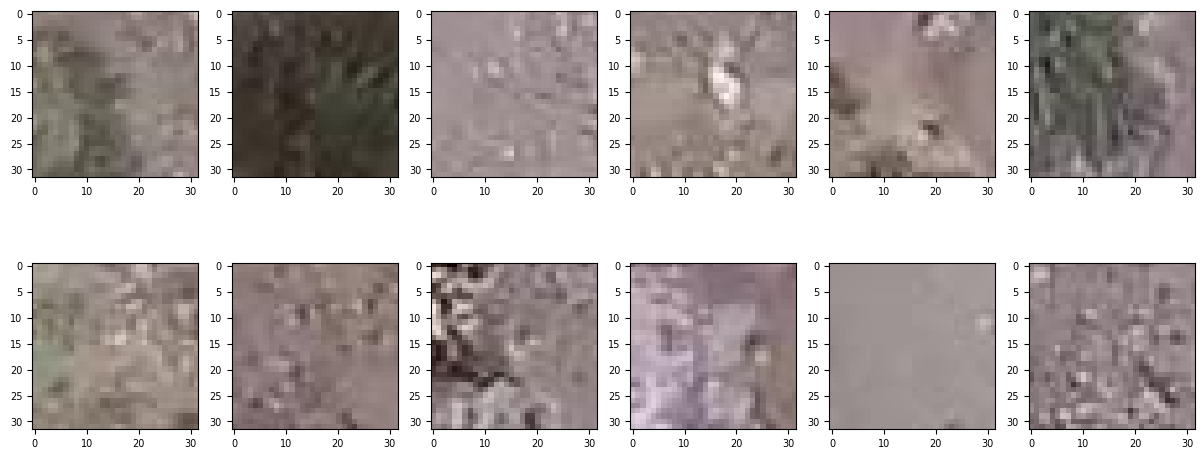

In [11]:
plt.figure(figsize=(15,6))
grid = gridspec.GridSpec(2,6)

# 선인장을 포함하지 않는 이미지 중 마지막 12개의 파일명
last_hasnt_cactus_img_name = labels[labels['has_cactus'] == 0]['id'][-12:]

# 반복문을 통해 이미지 출력하기
for idx, img_name in enumerate(last_hasnt_cactus_img_name):
    img_path = 'train/' + img_name
    image = cv2.imread(img_path)    # 이미지 파일 읽기
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # 색상 보정, 없는 경우 흙 색이 푸른색으로 나오는 사진이 있음
    ax = plt.subplot(grid[idx])
    ax.imshow(image)

이미지 shape
- 채널? 뭘 말하는 거지?

In [12]:
image.shape

(32, 32, 3)